# Imports and Utils

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import re
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
basepath = "/content/drive/MyDrive/DataMining22Gruppo8/data/dataset"

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apach

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 5.0 MB/s 


#Visualization functions

In [ ]:
def visualize(data=None, x=None, y=None, xlabel=None, ylabel=None, title=None, plot_type="plot", ax=None, **kwargs):
  plts = ['plot', 'hist', 'scatter', 'boxplot', 'barplot']
  if plot_type not in plts:
      raise ValueError("Invalid plot type. Expected one of: %s" % plts)
  
  if(plot_type == "scatter"):
    sns.scatterplot(data=data, x=x, y=y, ax=ax, **kwargs)
  elif(plot_type == "plot"):
    sns.lineplot(data=data, x=x, y=y, ax=ax, **kwargs)
  elif(plot_type == "hist"):
    sns.histplot(data=data, x=x, y=y, ax=ax, **kwargs)
  elif(plot_type == "boxplot"):
    sns.boxplot(data=data, x=x, y=y, ax=ax, **kwargs)
  elif(plot_type == "barplot"):
    sns.barplot(data=data, x=x, y=y, ax=ax, **kwargs)

  plt.xlabel(xlabel, fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  plt.title(title, fontsize=16)
  plt.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
class Correlation():
  def __init__(self,df):
    self.df = df

  def compute(self,frac):
    self.mx = self.df.sample(frac=frac).corr()
  
  def heatmap(self, dim):
    fig, ax = plt.subplots(figsize=(dim, dim))
    im = ax.imshow(self.mx)
    im.set_clim(-1,1)
    fig.colorbar(im, orientation='vertical', fraction = 0.05)

    # Show and rotate ticks
    plt.xticks(np.arange(len(self.mx.columns)),self.mx.columns, rotation=90, fontsize=15)
    plt.yticks(np.arange(len(self.mx.index)),self.mx.index, rotation=0, fontsize=15)

    # Add numerical values
    for i in range(len(self.mx.columns)):
        for j in range(len(self.mx.index)):
            text = ax.text(j, i, round(self.mx.to_numpy()[i, j], 1),
                          ha="center", va="center", color="black")

    plt.show()


In [ ]:
from itertools import combinations

def cluster_plots(df): 
  plots = list(combinations([key for key in df.keys()], 2))
  
  for x,y in plots:
    plt.figure(figsize=(9,6))
    visualize(x=df[x][dbscan.labels_ != -1], y=df[y][dbscan.labels_ != -1], 
            plot_type='scatter', c=dbscan.labels_[dbscan.labels_ != -1], xlabel=x, ylabel=y,
            title="{} over {}".format(x, y)) 
    plt.show

# 4 Time series

We first load the datasets

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.8/875.8 KB 11.1 MB/s eta 0:00:00


In [ ]:
pp_tweets = pd.read_csv(basepath + '/pp_tweets.csv', lineterminator='\n', index_col=0, parse_dates=['created_at'])

In [ ]:
#load users
pp_users = pd.read_csv(basepath + '/pp_users_v2.csv', index_col='id', parse_dates=['created_at'])

In [ ]:
pp_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9817930 entries, 0 to 9932947
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            int64         
 1   created_at         datetime64[ns]
 2   retweet_count      float64       
 3   reply_count        float64       
 4   favorite_count     float64       
 5   num_hashtags       float64       
 6   num_urls           float64       
 7   num_mentions       float64       
 8   text               object        
 9   information_score  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 824.0+ MB


We extract only tweets from 2019

In [ ]:
tweets_19 = pp_tweets[pp_tweets.created_at.apply(lambda x: x.year) == 2019]

The dataset of tweets we took was the one with the field reply_count, when we had this field we had not already completed the cleaning. So, we are gonna remove some outlier

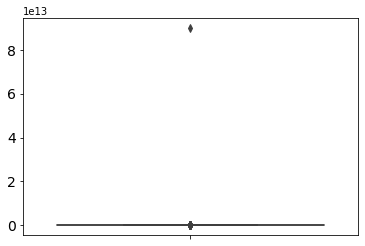

In [ ]:
visualize(y=tweets_19.reply_count, plot_type='boxplot')

In [ ]:
tweets_19.drop(tweets_19[tweets_19['num_hashtags']>1e25].index[0], inplace=True)

In [ ]:
tweets_19.drop((tweets_19[tweets_19["num_mentions"]>46]).index, inplace=True)
tweets_19.drop((tweets_19[tweets_19["num_urls"]>46]).index, inplace=True)
tweets_19.drop((tweets_19[pp_tweets["num_hashtags"]>93]).index, inplace=True)

In [ ]:
tweets_19.drop((tweets_19[tweets_19["favorite_count"]>72*(10**5)]).index, inplace=True)

In [ ]:
for outlier in tweets_19[tweets_19["reply_count"]>10**7].index:
  tweets_19.drop(outlier, inplace=True)

In [ ]:
tweets_19.isna().any()

user_id              False
created_at           False
retweet_count        False
reply_count          False
favorite_count       False
num_hashtags         False
num_urls             False
num_mentions         False
text                  True
information_score    False
dtype: bool

We extract the day of the year

In [ ]:
tweets_19["day_of_2019"] = (tweets_19.created_at-pd.to_datetime("2019-01-01")).dt.ceil('d').dt.days

Compute the partial acceptance score and diffusion score 

In [ ]:
tweets_19["partial_acc_score"] = tweets_19.retweet_count + tweets_19.favorite_count + tweets_19.reply_count

In [ ]:
tweets_19["partial_diff_score"] = tweets_19.num_hashtags + tweets_19.num_mentions + tweets_19.num_urls

Compute total acceptance score and diffusion score

In [ ]:
df = tweets_19.groupby(['user_id', 'day_of_2019'])["partial_acc_score", "partial_diff_score"].sum().reset_index()

In [ ]:
df.rename(columns={'partial_acc_score': 'acceptance_score', 'partial_diff_score': 'diffusion_score'}, inplace=True)

Compute success score

In [ ]:
df["success_score"] = df.acceptance_score / (df.diffusion_score + 0.1)

Add 'bot' field (we will need it later)

In [ ]:
df = pd.merge(df, pp_users['bot'], left_on='user_id', right_on='id', how='inner')

In [ ]:
df

,user_id,day_of_2019,acceptance_score,diffusion_score,success_score,bot
0,722623,3,11.0,7.0,1.549296,0
1,722623,4,9921.0,6.0,1626.393443,0
2,722623,5,2.0,1.0,1.818182,0
3,722623,6,1.0,3.0,0.322581,0
4,722623,7,151.0,13.0,11.526718,0
...,...,...,...,...,...,...
517639,2722021425,209,5.0,1.0,4.545455,0
517640,2722021425,210,4.0,1.0,3.636364,0
517641,2722021425,211,6.0,4.0,1.463415,0
517642,2722021425,212,2952.0,1.0,2683.636364,0


In [ ]:
print(df.day_of_2019.min())
print(df.day_of_2019.max())

1
319


In [ ]:
len(df.user_id.unique())

6786

We now reassign ids from 0 to 6785

In [ ]:
# Create a dictionary mapping the old user IDs to the new consecutive integers
id_map = {old: new for new, old in enumerate(df['user_id'].unique())}
# Replace the user IDs in the dataframe with the new consecutive integers
df['user_id'] = df['user_id'].map(id_map)

### 4.0.1 Checkpoint

It's time to create a check point:

In [ ]:
#save
#df.to_csv(basepath+"/ts_df.csv")

In [ ]:
#load
df = pd.read_csv(basepath + '/ts_df.csv', lineterminator='\n', index_col=0)

In [ ]:
df

,user_id,day_of_2019,acceptance_score,diffusion_score,success_score,bot
0,0,3,11.0,7.0,1.549296,0
1,0,4,9921.0,6.0,1626.393443,0
2,0,5,2.0,1.0,1.818182,0
3,0,6,1.0,3.0,0.322581,0
4,0,7,151.0,13.0,11.526718,0
...,...,...,...,...,...,...
517639,6785,209,5.0,1.0,4.545455,0
517640,6785,210,4.0,1.0,3.636364,0
517641,6785,211,6.0,4.0,1.463415,0
517642,6785,212,2952.0,1.0,2683.636364,0


We create an ndarray of time series, one for each user

In [ ]:
series_list = []
bot_list = []

for user_id in df['user_id'].unique():
    # Create a new series for the current user ID
    s = pd.Series([-1] * 319, index=range(1, 320))
    # Select the rows of the dataframe corresponding to the current user ID
    user_df = df[df['user_id'] == user_id]
    bot = df[df['user_id'] == user_id]['bot'].values[0]
    for _, row in user_df.iterrows():
        # Set the value of the series for the corresponding day to the acceptance score
        s.loc[row['day_of_2019']] = row['acceptance_score']
    series_list.append(s)
    bot_list.append(bot)
series_array = np.array(series_list)

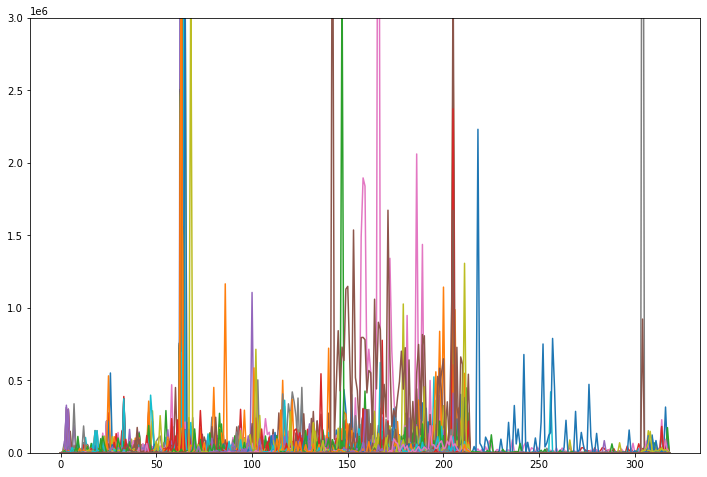

In [ ]:
plt.figure(figsize=(12,8))
for s in series_array:
    plt.plot(s)
plt.ylim(-1, 3*1e6)
plt.show()

## 4.1 Clustering

### 4.1.1 Shape-based clustering

In [ ]:
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
km = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=10, random_state=0)
km.fit(series_array)

TimeSeriesKMeans(max_iter=10, n_clusters=5, random_state=0)

In [ ]:
series_array.shape

(6786, 319)

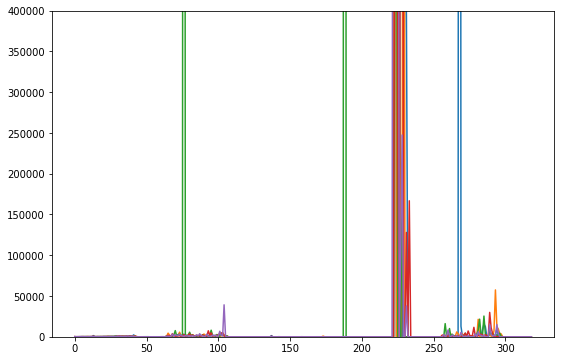

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(km.cluster_centers_.reshape(series_array.shape[1], 5))
plt.ylim(-1,4*1e5)
plt.show()

Let's zoom the y axis

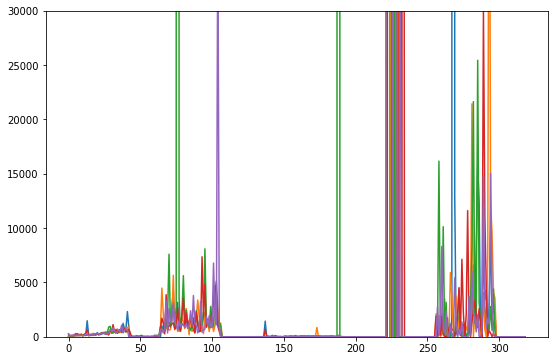

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(km.cluster_centers_.reshape(series_array.shape[1], 5))
plt.ylim(-1,3e4)
plt.show()

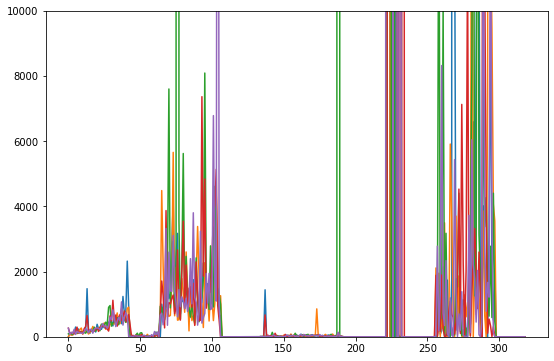

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(km.cluster_centers_.reshape(series_array.shape[1], 5))
plt.ylim(-1,1e4)
plt.show()

In [ ]:
km.inertia_

35500938487.47594

Maybe we need to rescale, but first let's try with dynamic time warp distance

In [ ]:
from tslearn.metrics import dtw

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(series_array)

dtw is too computationally expensive, colab crashed before the end of the computation. So, let's try to rescale:

let's try to sample the dataset

In [ ]:
sample_series = series_array[np.random.randint(series_array.shape[0], size=int(series_array.shape[0]*0.1)), :]

In [ ]:
sample_series.shape

(678, 319)

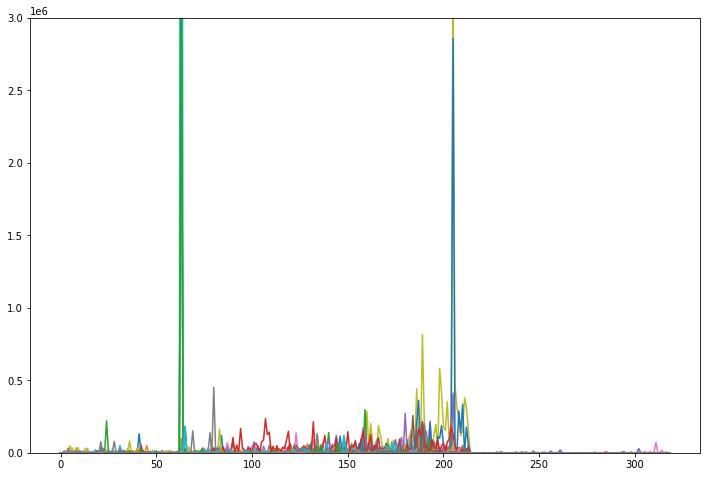

In [ ]:
plt.figure(figsize=(12,8))
for s in sample_series:
    plt.plot(s)
plt.ylim(-1, 3*1e6)
plt.show()

the sampling seems to have cut off many high valued time series. though, it would not have been possible to run clustering using dtw metrics due to the high computational costs. 

We'll run them being conscious of the sampling limit

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(sample_series)

TimeSeriesKMeans(max_iter=5, metric='dtw', n_clusters=5, random_state=0)

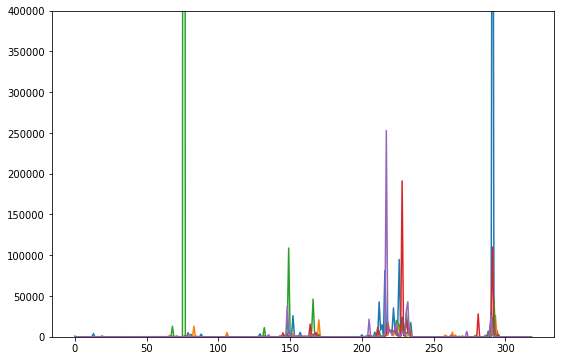

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(km_dtw.cluster_centers_.reshape(series_array.shape[1], 5))
plt.ylim(-1,4*1e5)
plt.show()

In [ ]:
km_dtw.inertia_

925961462.2533922

#### 4.1.1.1 Min-Max Scaler

In [ ]:
series_array.shape

(6786, 319)

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn import metrics
from sklearn.metrics import pairwise_distances
scaler = TimeSeriesScalerMinMax(value_range=(1., 2.))  
series_scaled = scaler.fit_transform(series_array)
sample_series_scaled = scaler.fit_transform(sample_series)

In [ ]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 12
for k in range(1, max_k):
    print(k, end='...') # see working progress
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", max_iter=10, random_state=0)
    kmeans.fit(series_scaled)
    labels = kmeans.fit_predict(series_scaled)

    sse = kmeans.inertia_
    sse_list.append(sse)
    if k>1:
      #separations.append(kmeans.inertia)
      X = series_scaled.reshape(series_scaled.shape[0], -1)
      silouettes_.append(metrics.silhouette_score(X, labels))
      separations.append(metrics.davies_bouldin_score(X, labels))

1...2...3...4...5...6...7...8...9...10...11...

In [ ]:
def clusters_features_plot(values_list, ylabel):
    visualize(x=range(2, len(values_list) + 1), y=values_list[1:], xlabel='K', ylabel=ylabel, plot_type="plot")
    plt.xticks(range(1, len(values_list) + 1))
    plt.show()

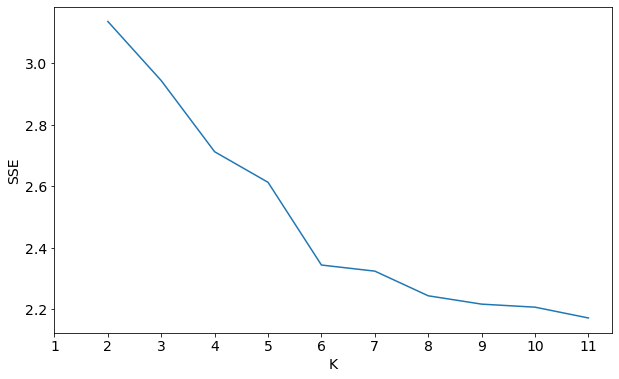

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(sse_list, "SSE")

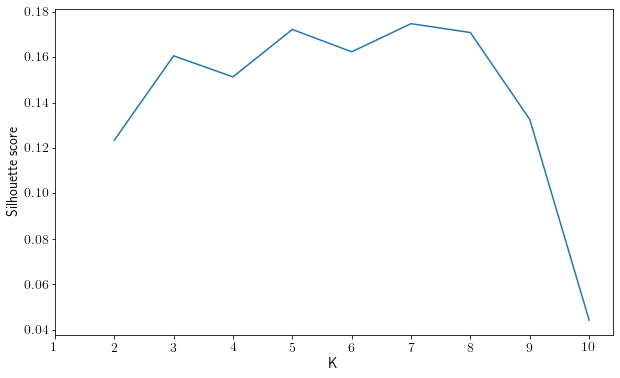

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(silouettes_, "Silhouette score")

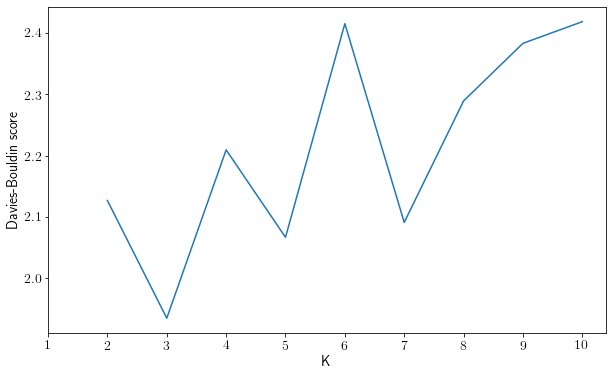

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(separations, "Davies-Bouldin score")

There is not a clear winner for the best K. We observe that SSE and silhouette prediliges K=6, but 6 is the worst value for the Davies-Bouldin score. A good value both for DB score and silhouette could be K=7 or K=3. So, we will try these three values:

##### K = 6

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(n_clusters=6, random_state=0)

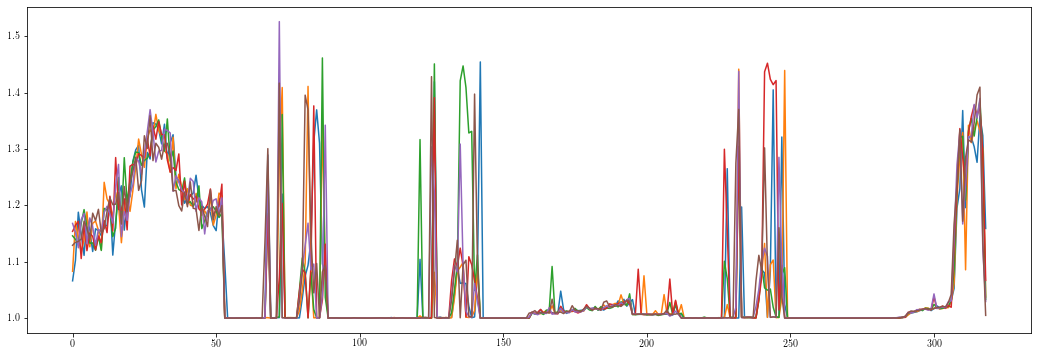

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 6))
plt.show()

let's see running dtw with sampled dataset

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', n_clusters=6, random_state=0)

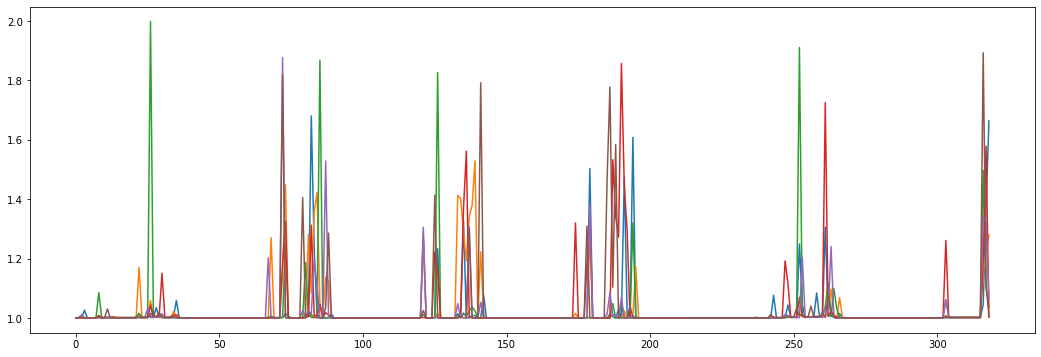

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 6))
plt.show()

##### K = 7

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=7, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(n_clusters=7, random_state=0)

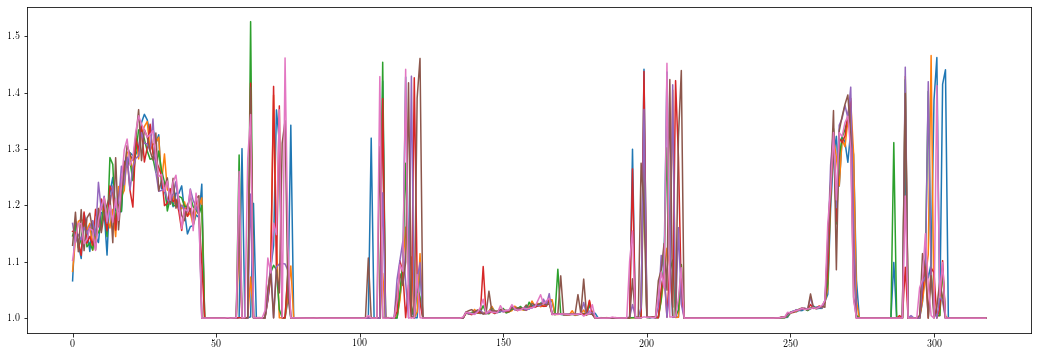

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 7))
plt.show()

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', n_clusters=7, random_state=0)

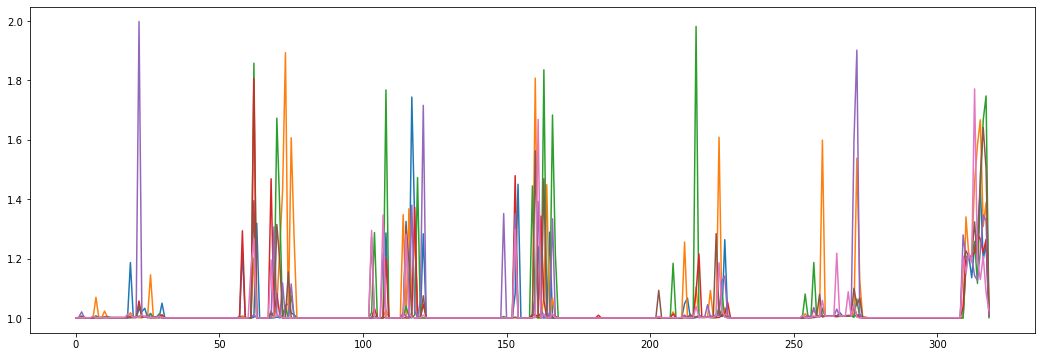

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 7))
plt.show()

##### K = 3

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(random_state=0)

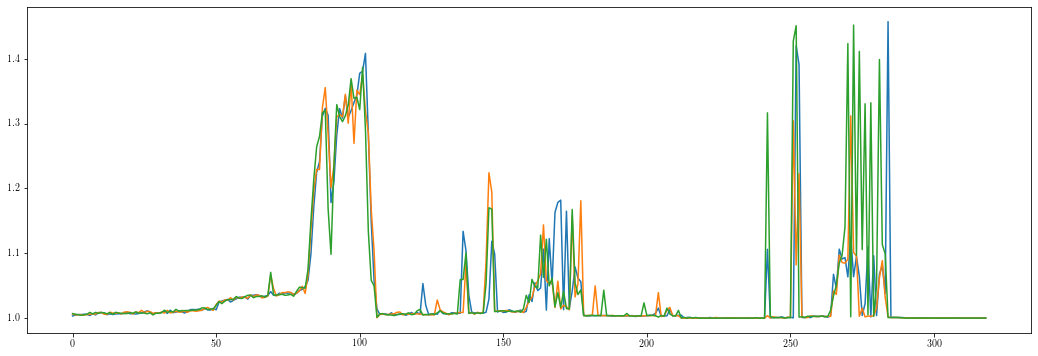

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 3))
plt.show()

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', random_state=0)

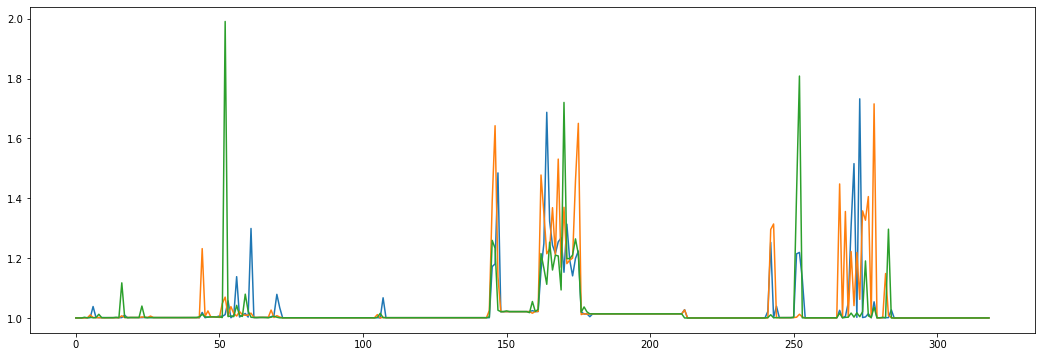

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 3))
plt.show()

#### 4.1.1.2 Mean-Variance Scaler

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  
series_scaled = scaler.fit_transform(series_array)
sample_series_scaled = scaler.fit_transform(sample_series)

In [ ]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 12
for k in range(1, max_k):
    print(k, end='...') # see working progress
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", max_iter=10, random_state=0)
    kmeans.fit(series_scaled)
    labels = kmeans.fit_predict(series_scaled)

    sse = kmeans.inertia_
    sse_list.append(sse)
    if k>1:
      #separations.append(kmeans.inertia)
      X = series_scaled.reshape(series_scaled.shape[0], -1)
      silouettes_.append(metrics.silhouette_score(X, labels))
      separations.append(metrics.davies_bouldin_score(X, labels))

1...2...3...4...5...6...7...8...9...10...11...

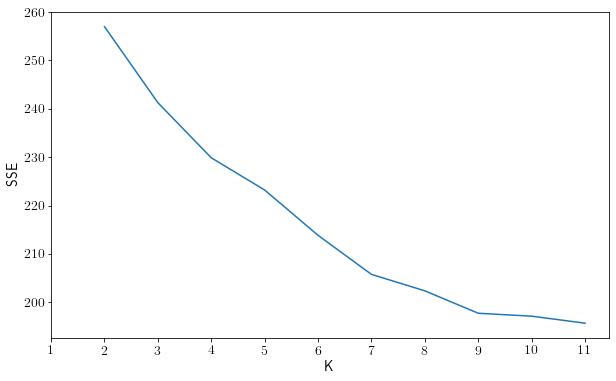

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(sse_list, "SSE")

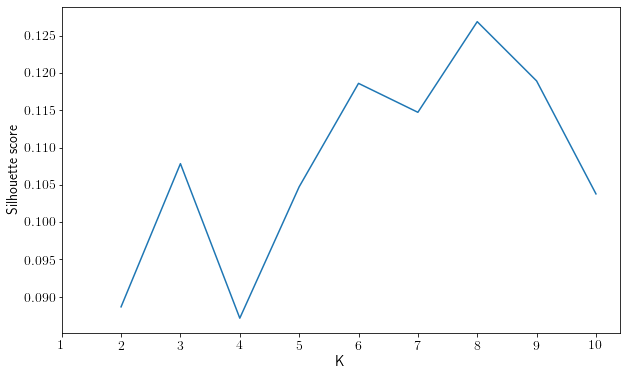

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(silouettes_, "Silhouette score")

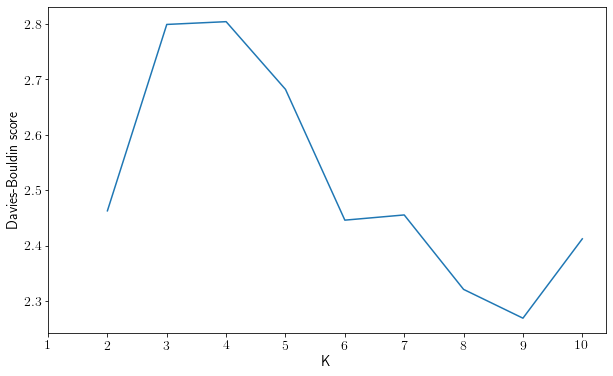

In [ ]:
plt.figure(figsize=(10,6))
clusters_features_plot(separations, "Davies-Bouldin score")

The results seem to be worse than that we obtained with the Min-Max scaler. However, we try to look at the plots with the best values of K, which are 6, 8 and 9

##### K = 6

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(n_clusters=6, random_state=0)

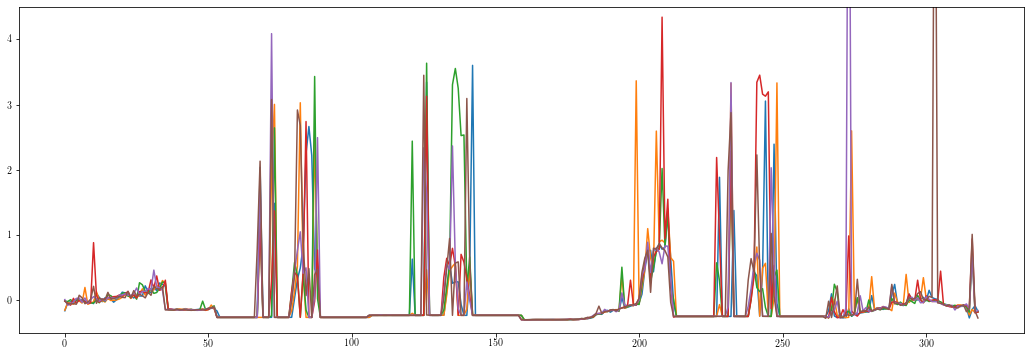

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 6))
plt.ylim(-0.5, 4.5)
plt.show()

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', n_clusters=6, random_state=0)

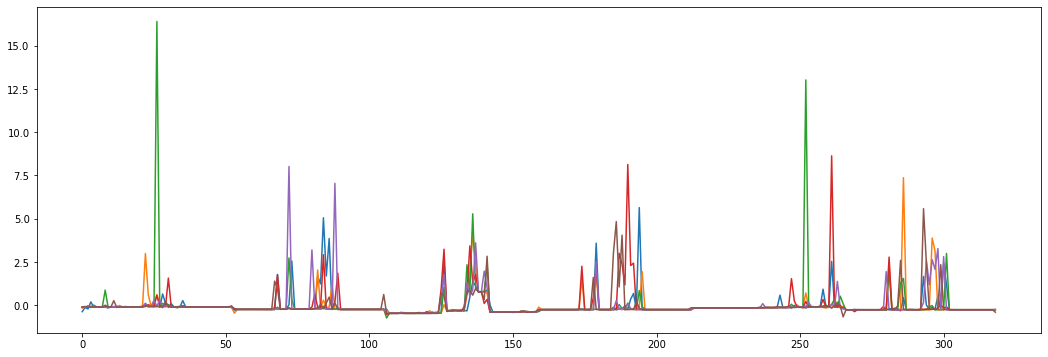

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 6))
plt.show()

##### K = 8

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=8, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(n_clusters=8, random_state=0)

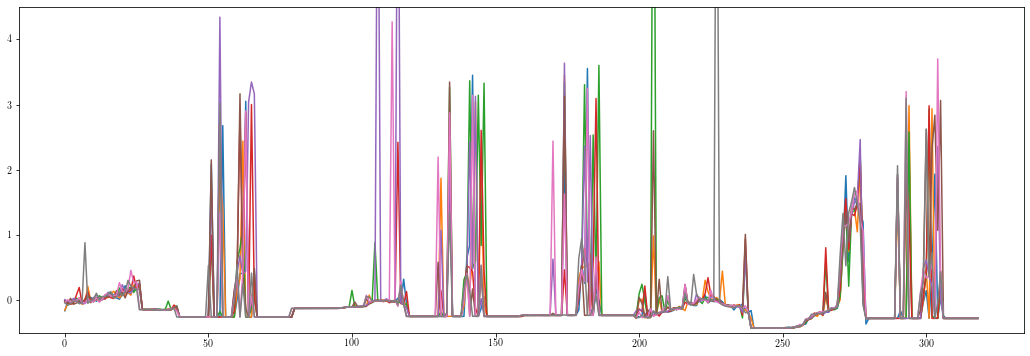

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 8))
plt.ylim(-0.5,4.5)
plt.show()

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=8, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', n_clusters=8, random_state=0)

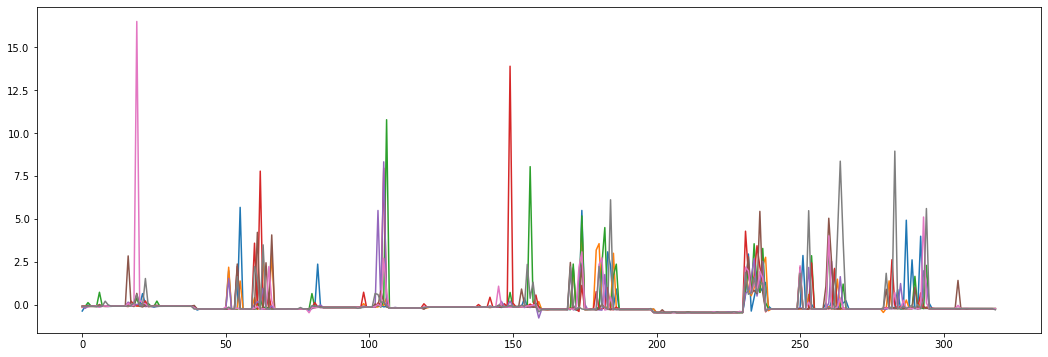

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 8))
plt.show()

##### K = 9

In [ ]:
kmeans = TimeSeriesKMeans(n_clusters=9, metric="euclidean", max_iter=50, random_state=0)
kmeans.fit(series_scaled)

TimeSeriesKMeans(n_clusters=9, random_state=0)

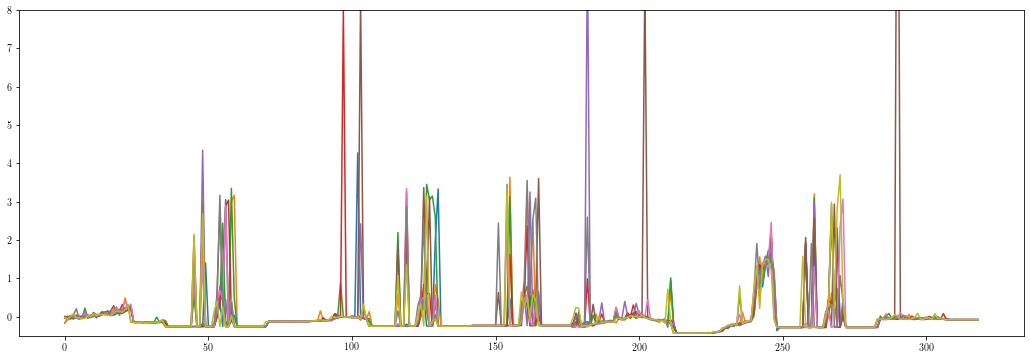

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans.cluster_centers_.reshape(series_scaled.shape[1], 9))
plt.ylim(-0.5,8)
plt.show()

In [ ]:
kmeans_dtw = TimeSeriesKMeans(n_clusters=9, metric="dtw", max_iter=50, random_state=0)
kmeans_dtw.fit(sample_series_scaled)

TimeSeriesKMeans(metric='dtw', n_clusters=9, random_state=0)

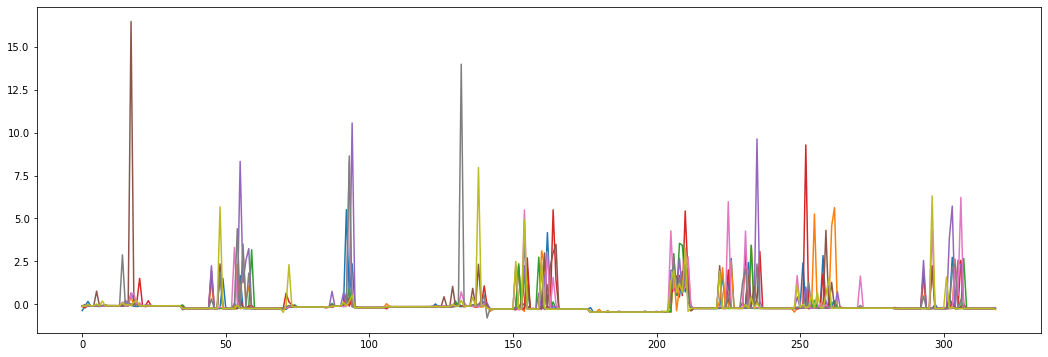

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(kmeans_dtw.cluster_centers_.reshape(sample_series_scaled.shape[1], 9))
plt.show()

Provare forse log scale su X

In [ ]:
km = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=10, random_state=0)
km.fit(series_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=5, random_state=0)

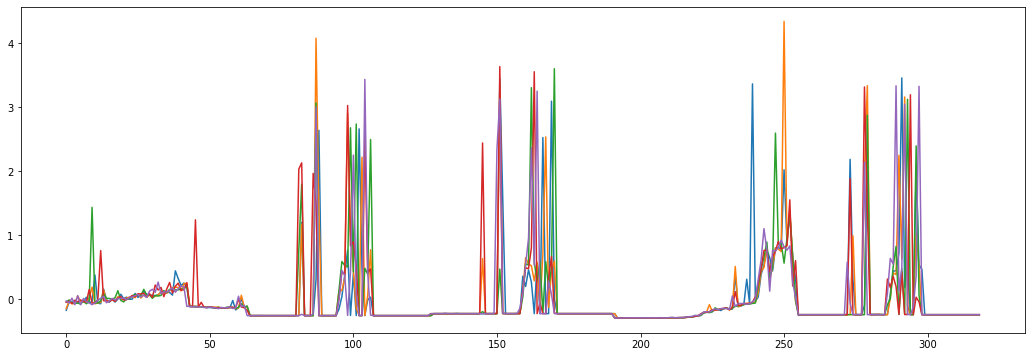

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(km.cluster_centers_.reshape(series_scaled.shape[1], 5))
plt.show()

In [ ]:
km.inertia_

223.21692622863773

### 4.1.2 Feature-based clustering

In [ ]:
import scipy.stats as stats
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
F = [list(calculate_features(s).values())[:-2] for s in series_array]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(F)

KMeans(n_clusters=5)

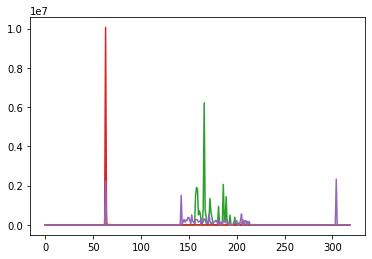

In [ ]:
for i in range(5):
    plt.plot(np.mean(series_array[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

it seems there are only 3 differentiated clusters

In [ ]:
kmeans.inertia_

1.538925609701852e+21

let's try with minmax scaler

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
scaler = TimeSeriesScalerMinMax(value_range=(1., 2.))  
series_scaled = scaler.fit_transform(series_array)

In [ ]:
import scipy.stats as stats
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [ ]:
F = [list(calculate_features(s).values())[:-2] for s in series_scaled]

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 12
for k in range(1, max_k):
    print(k, end='...') # see working progress
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", max_iter=10, random_state=0)
    kmeans.fit(F)
    labels = kmeans.fit_predict(F)

    sse = kmeans.inertia_
    sse_list.append(sse)
    if k>1:
      #separations.append(kmeans.inertia)
      silouettes_.append(metrics.silhouette_score(F, labels))
      separations.append(metrics.davies_bouldin_score(F, labels))

1...2...3...4...5...6...7...8...9...10...11...

In [ ]:
def clusters_features_plot(values_list, ylabel):
    visualize(x=range(2, len(values_list) + 1), y=values_list[1:], xlabel='K', ylabel=ylabel, plot_type="plot")
    plt.xticks(range(1, len(values_list) + 1))
    plt.show()

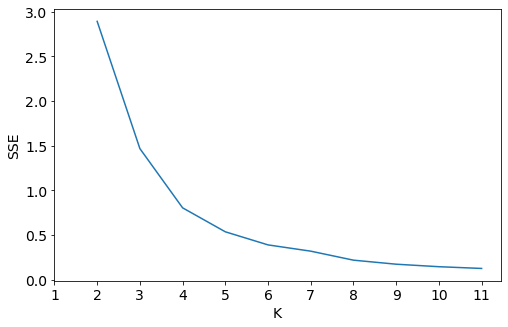

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(sse_list, "SSE")

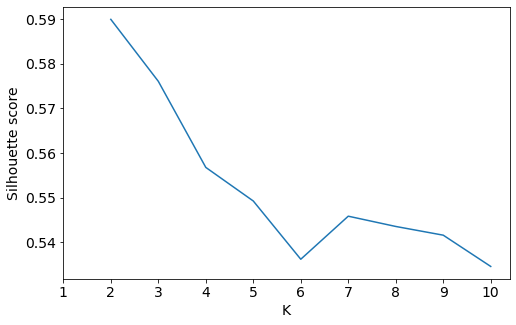

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(silouettes_, "Silhouette score")

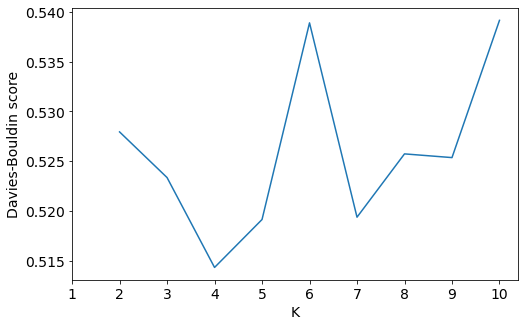

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(separations, "Davies-Bouldin score")

We take K=4

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(F)

KMeans(n_clusters=4)

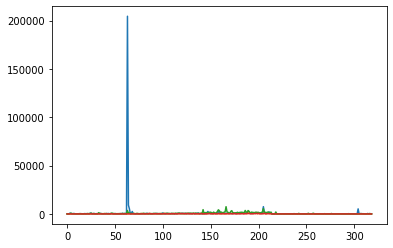

In [ ]:
for i in range(4):
    plt.plot(np.mean(series_array[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

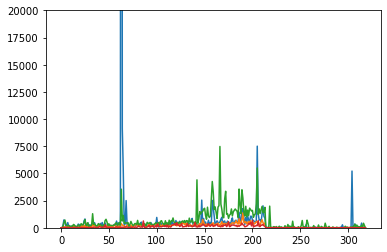

In [ ]:
for i in range(4):
    plt.plot(np.mean(series_array[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.ylim(0, 20000)
plt.show()

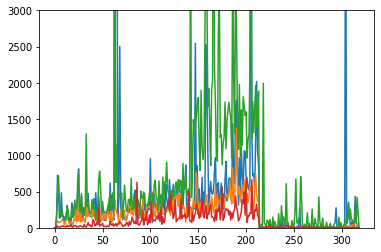

In [ ]:
for i in range(4):
    plt.plot(np.mean(series_array[np.where(kmeans.labels_ == i)[0]], axis=0))
    plt.ylim(0, 3000)
plt.show()

In [ ]:
kmeans.inertia_

5456.972228237928

the sse seems to be lower, but it is kinda obvious since we scaled the values between 1 and 2 range.

The results with Feature-based clustering seems to be better than that we obtained with shape-based clustering: the centroids time series seems to be more different among them, while with shape-based clustering the centroids seems to be very similar.

### 4.1.2 Compression-based clustering

In [ ]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

since the pairwise distance calculation would be to much time expensive, we will sample the time series array to cluster it

In [ ]:
import numpy as np

# Load the time series data
X = series_array # array of shape (n_samples, n_timesteps)

# Set the size of the sample
sample_size = 1000

# Select a random subset of the time series data using numpy.random.choice
sample_indices = np.random.choice(X.shape[0], size=sample_size, replace=False)
X_sample = X[sample_indices, :]

In [ ]:
X_sample.shape

(1000, 319)

In [ ]:
from sklearn.metrics import pairwise_distances
import zlib
M = pairwise_distances(X_sample, metric=cdm_dist)

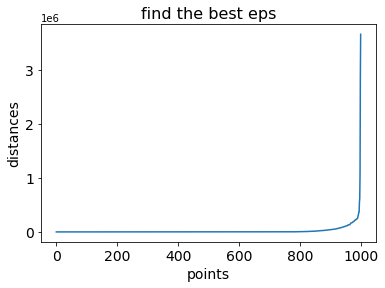

In [ ]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)

neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X_sample)
distances = np.sort(distances[:,10], axis=0)

visualize(data=distances, xlabel='points', ylabel='distances', title='find the best eps')
plt.show()

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 360x360 with 0 Axes>

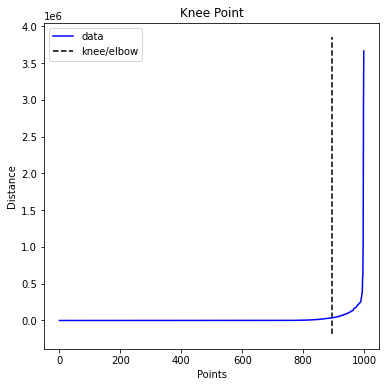

36500.51581827304


In [ ]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

print(distances[knee.knee])

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=36500, min_samples=1, metric='precomputed')
dbscan.fit(M)

DBSCAN(eps=36500, metric='precomputed', min_samples=1)

In [ ]:
np.unique(dbscan.labels_)

array([0])

having tried some different parameter tuning, no one of them actually gives us interesting results. thus we'll try using kmeans with paa instead

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(dbscan.cluster_centers_.reshape(sample_series_scaled.shape[1], 9))
plt.show()

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 14.1 MB/s 


In [ ]:
from tslearn.piecewise import PiecewiseAggregateApproximation
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(X)

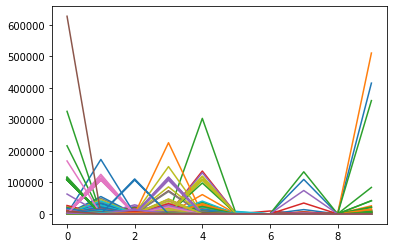

In [ ]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 12
for k in range(1, max_k):
    print(k, end='...') # see working progress
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="euclidean", max_iter=10, random_state=0)
    kmeans.fit(X_paa)
    labels = kmeans.fit_predict(X_paa)

    sse = kmeans.inertia_
    sse_list.append(sse)
    if k>1:
      #separations.append(kmeans.inertia)
      X = X_paa.reshape(X_paa.shape[0], -1)
      silouettes_.append(metrics.silhouette_score(X, labels))
      separations.append(metrics.davies_bouldin_score(X, labels))

1...2...3...4...5...6...7...8...9...10...11...

In [ ]:
def clusters_features_plot(values_list, ylabel):
    visualize(x=range(2, len(values_list) + 1), y=values_list[1:], xlabel='K', ylabel=ylabel, plot_type="plot")
    plt.xticks(range(1, len(values_list) + 1))
    plt.show()

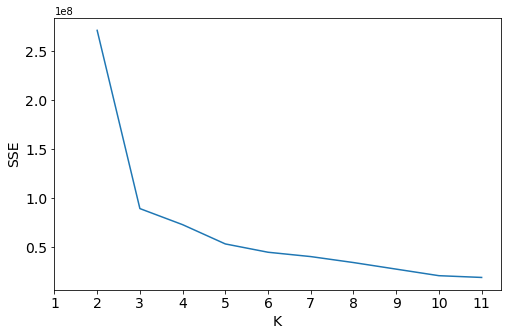

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(sse_list, "SSE")

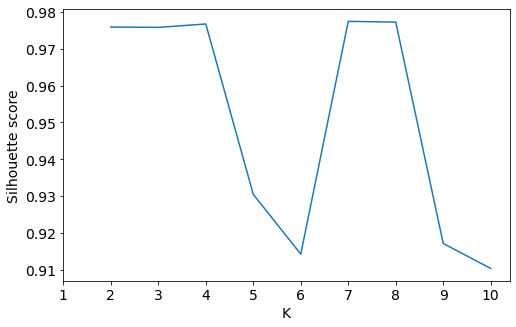

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(silouettes_, "Silhouette score")

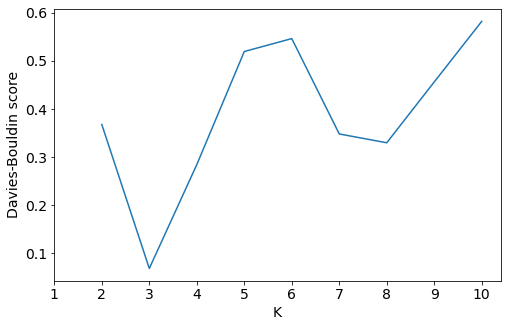

In [ ]:
plt.figure(figsize=(8,5))
clusters_features_plot(separations, "Davies-Bouldin score")

The best K is clearly K=3

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(max_iter=5, random_state=0)

In [ ]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([6686,    2,   98]))

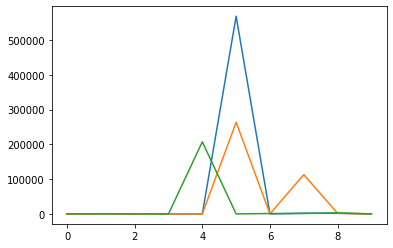

In [ ]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 3))
plt.show()

even though plots looks good, clusters are way unbalanced.



we can conclude that compression based clustering might not have been the best choice so far

##4.2 Classification via Shapelets

###4.2.1 Classification with ShapeletTransform

In [ ]:
series_array.shape

(6786, 319)

In [ ]:
len(bot_list)

6786

In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.2 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pyts.transformation import ShapeletTransform

# Load the time series data and labels
X = series_array # array of shape (n_samples, n_timesteps)
y = bot_list # array of shape (n_samples,)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for the algorithm
n_shapelets = 5 # number of shapelets to discover
window_size = 319 # maximum length of the shapelets

st = ShapeletTransform(n_shapelets=n_shapelets, window_sizes=[window_size])
X_train_shapelets = st.fit_transform(X_train, y_train)
X_test_shapelets = st.transform(X_test)

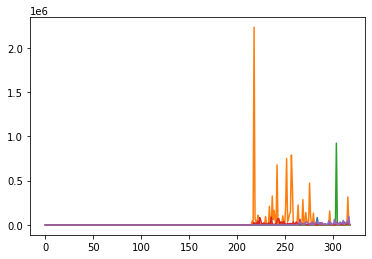

In [ ]:
for s in st.shapelets_:
  plt.plot(s)

plt.show()

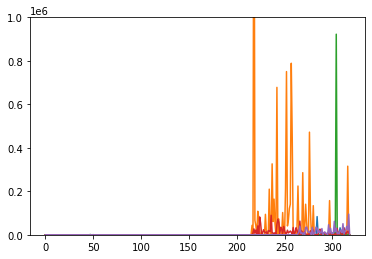

In [ ]:
for s in st.shapelets_:
  plt.plot(s)

plt.ylim(0,1e6)
plt.show()

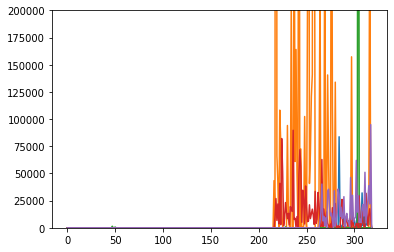

In [ ]:
for s in st.shapelets_:
  plt.plot(s)

plt.ylim(0,.2e6)
plt.show()

these are the 5 most representative time series, used for classification purposes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_shapelets, y_train)

# Evaluate the classifier's performance on the test set
accuracy_train = neigh.score(X_train_shapelets, y_train)
print("Train accuracy:", accuracy_train)
accuracy = neigh.score(X_test_shapelets, y_test)
print("Test accuracy:", accuracy)

Train accuracy: 0.9830508474576272
Test accuracy: 0.7761413843888071


In [ ]:
knn_test = list()
knn_train = list()

for k in range(1,100):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_shapelets, y_train)
  knn_test.append(neigh.score(X_test_shapelets, y_test))
  knn_train.append(neigh.score(X_train_shapelets, y_train))

best_acc = max(knn_test)
k = knn_test.index(best_acc)
print("best accuracy reached with k={} \nAccuracy on train: {} \nAccuracy on test: {}".format(k, knn_train[k], best_acc))

best accuracy reached with k=28 
Accuracy on train: 0.8240604274134119 
Accuracy on test: 0.8483063328424153


In [ ]:
# Train a classifier on the transformed data
clf = RandomForestClassifier()
clf.fit(X_train_shapelets, y_train)

accuracy_train = clf.score(X_train_shapelets, y_train)
print("Train accuracy:", accuracy_train)
accuracy = clf.score(X_test_shapelets, y_test)
print("Test accuracy:", accuracy)

Train accuracy: 0.8218496683861459
Test accuracy: 0.8306332842415317


using full window size we obtain some decent values of accuracy, with just 5 overall shapelets 

let's try having smaller windows. this will significantly slow the process, thus we'll use a smaller training set (i.e.: 10% of the dataset)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from pyts.transformation import ShapeletTransform

# Load the time series data and labels
X = series_array # array of shape (n_samples, n_timesteps)
y = bot_list # array of shape (n_samples,)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

print(len(X_train))
# Set the parameters for the algorithm
n_shapelets = 5 # number of shapelets to discover
window_size = 150 # maximum length of the shapelets
window_steps = 5 

st = ShapeletTransform(n_shapelets=n_shapelets, window_sizes=[window_size], window_steps=[window_steps])
# st = ShapeletTransform(n_shapelets=n_shapelets, window_sizes=[window_size])
X_train_shapelets = st.fit_transform(X_train, y_train)
X_test_shapelets = st.transform(X_test)

678


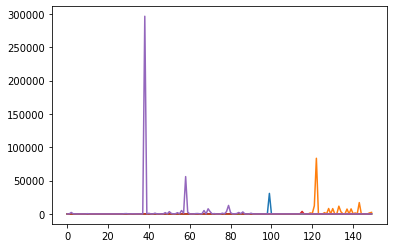

In [ ]:
for s in st.shapelets_:
  plt.plot(s)

plt.show()

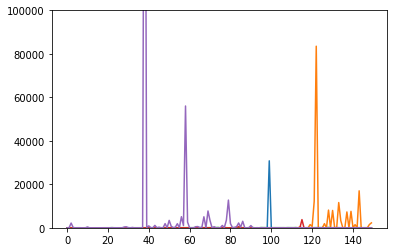

In [ ]:
for s in st.shapelets_:
  plt.plot(s)

plt.ylim(0,0.1e6)
plt.show()

In [ ]:
# Train a classifier on the transformed data
clf = RandomForestClassifier()
clf.fit(X_train_shapelets, y_train)

# Evaluate the classifier's performance on the test set
accuracy = clf.score(X_test_shapelets, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.7758677144728225


shortening the window size will increase the time spent on the training

###4.2.2 Classification with LearningShapelets


we'll try using a keras model to extract shapelets

In [ ]:
from tensorflow.keras.optimizers import Adagrad, SGD
from tslearn.shapelets import LearningShapelets
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

In [ ]:
n_ts, ts_sz = series_array.shape
n_classes = len(set(bot_list))

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=.4,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 6786
ts_sz 319
n_classes 2
shapelet_sizes {127: 6}


In [ ]:
# Load the time series data and labels
X = series_array # array of shape (n_samples, n_timesteps)
y = bot_list # array of shape (n_samples,)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                        optimizer="adam",
                        weight_regularizer=.01,
                        batch_size=128,
                        max_iter=200,
                        verbose=1)

X_train_shapelets = shp_clf.fit(X_train, y_train)

Epoch 1/200
43/43 [==============================] - 6s 81ms/step - loss: 170879975424.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 170879975424.0000
Epoch 2/200
43/43 [==============================] - 3s 78ms/step - loss: 152265621504.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 152265621504.0000
Epoch 3/200
43/43 [==============================] - 4s 82ms/step - loss: 133659639808.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 133659639808.0000
Epoch 4/200
43/43 [==============================] - 4s 84ms/step - loss: 115044450304.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 115044450304.0000
Epoch 5/200
43/43 [==============================] - 3s 72ms/step - loss: 96386211840.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 96386211840.0000
Epoch 6/200
43/43 [==============================] - 3s 71ms/step - loss: 77738967040.0000 - binary_accuracy: 0.5676 - binary_crossentropy: 77738967040.0000
Epoch 7/200
43/43 [==============================]

In [ ]:
from sklearn.metrics import accuracy_score
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))
predicted_locations = shp_clf.locate(X)

11/11 [==============================] - 0s 31ms/step
Correct classification rate: 0.7187039764359352
54/54 [==============================] - 2s 29ms/step


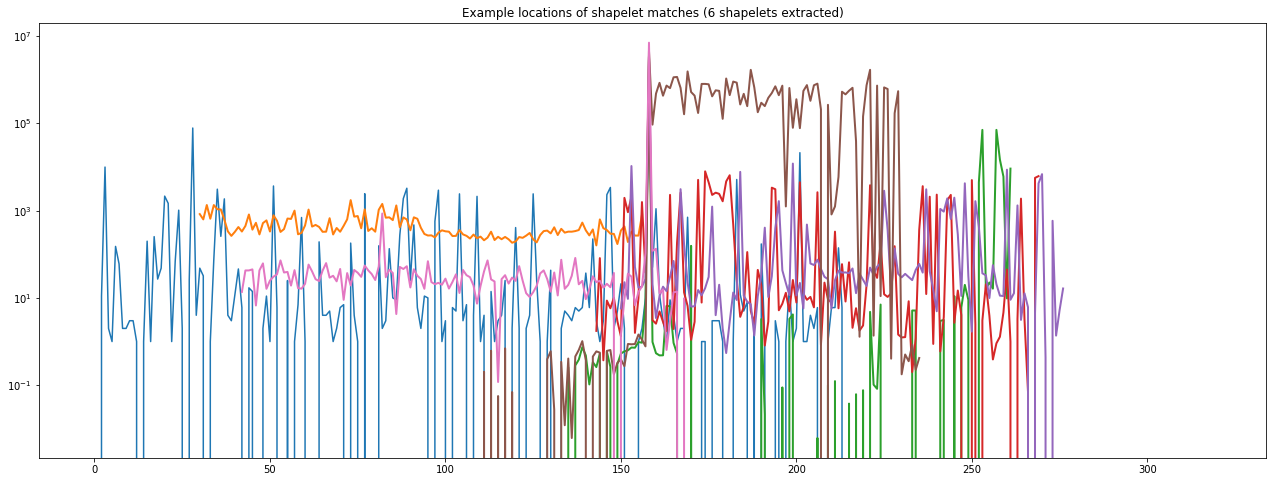

In [ ]:
ts_id = 0
plt.figure(figsize=(22,8))
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "({} shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

plt.yscale("log")
plt.show()

above we can see the time series used by the ShapeletLearning method